In [1]:
pip install tensorflow scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Monthly_data_cmo.csv')
df.head()

APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra

In [5]:
df.describe()

Year  arrivals_in_qtl     min_price     max_price  \
count  62429.000000     6.242900e+04  6.242900e+04  6.242900e+04   
mean    2015.337503     6.043088e+03  2.945228e+03  3.688814e+03   
std        0.690451     3.470331e+04  1.318396e+04  7.662962e+03   
min     2014.000000     1.000000e+00  0.000000e+00  0.000000e+00   
25%     2015.000000     3.800000e+01  1.250000e+03  1.600000e+03   
50%     2015.000000     2.110000e+02  1.976000e+03  2.797000e+03   
75%     2016.000000     1.364000e+03  3.900000e+03  4.647000e+03   
max     2016.000000     1.450254e+06  3.153038e+06  1.600090e+06   

         modal_price  
count   62429.000000  
mean     3296.003989  
std      3607.792534  
min         0.000000  
25%      1450.000000  
50%      2425.000000  
75%      4257.000000  
max    142344.000000

##PREPROCESSING

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your time series data into a pandas DataFrame
# Replace 'your_data.csv' with the actual file path or URL of your data
# Display the first few rows of the DataFrame
print("Original Data:")
print(df.head())

# Convert 'date' column to datetime format

df['date'] = pd.to_datetime(df['date'])
# Handling Missing Values
df = df.fillna(method='ffill')  # Forward fill missing values

# Resampling (e.g., downsampling to monthly frequency)
df = df.resample('M', on='date').mean()  # Resample to monthly frequency, using mean for aggregation

# Dealing with Outliers (replace values outside a certain range with NaN)
cols_to_exclude = ['APMC', 'Commodity', 'date', 'district_name', 'state_name']
for col in df.columns:
    if col not in cols_to_exclude:
        lower_bound = df[col].mean() - 3 * df[col].std()
        upper_bound = df[col].mean() + 3 * df[col].std()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Feature Engineering (add month and year as features)
#df['date'] = pd.to_datetime(df['date'])
#df['month'] = df['date'].dt.month
#df['year'] = df['date'].dt.year

# Normalization/Standardization (using StandardScaler)
scaler = StandardScaler()
numeric_columns = ['arrivals_in_qtl', 'min_price', 'max_price', 'modal_price']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Stationarity (ensure that the time series is stationary)
# Perform necessary transformations to make the time series stationary

# Encoding Categorical Variables (if applicable)
# One-hot encode categorical variables if needed

# Splitting into Training and Testing Sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Display the preprocessed data
print("\nPreprocessed Data:")
print(df.head())

# You can now use the 'train' and 'test' DataFrames for further analysis and modeling


Original Data:
         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  

Preprocessed Data:
              Year  arrivals_in_qtl  min_price  max_price  modal_price
date                                                                  


<ipython-input-6-e2606ef42117>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='date').mean()  # Resample to monthly frequency, using mean for aggregation


In [11]:
# Assuming 'df' is your DataFrame with timestamp and values columns
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['values'] = df['modal_price']

# Normalize the values using Min-Max scaling
scaler = MinMaxScaler()
df['scaled_values'] = scaler.fit_transform(df[['values']])





In [12]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Adjust as needed
X, y = create_sequences(df['scaled_values'].values, sequence_length)


In [13]:
X.shape

(62419, 10)

In [14]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1561/1561 [==============================] - 17s 8ms/step - loss: 5.3360e-04 - val_loss: 3.3984e-04
Epoch 2/50
1561/1561 [==============================] - 13s 8ms/step - loss: 4.9615e-04 - val_loss: 3.3997e-04
Epoch 3/50
1561/1561 [==============================] - 13s 8ms/step - loss: 4.9578e-04 - val_loss: 3.4903e-04
Epoch 4/50
1561/1561 [==============================] - 12s 8ms/step - loss: 4.8627e-04 - val_loss: 3.3530e-04
Epoch 5/50
1561/1561 [==============================] - 12s 8ms/step - loss: 4.8324e-04 - val_loss: 3.5107e-04
Epoch 6/50
1561/1561 [==============================] - 12s 7ms/step - loss: 4.7467e-04 - val_loss: 3.4416e-04
Epoch 7/50
1561/1561 [==============================] - 12s 8ms/step - loss: 4.7533e-04 - val_loss: 3.4194e-04
Epoch 8/50
1561/1561 [==============================] - 13s 8ms/step - loss: 4.7021e-04 - val_loss: 3.4479e-04
Epoch 9/50
1561/1561 [==============================] - 14s 9ms/step - loss: 4.6695e-04 - val_loss: 3.4070e-04
E

In [18]:
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", loss)


391/391 [==============================] - 1s 3ms/step - loss: 3.3592e-04
Mean Squared Error on Test Data: 0.000335920398356393


In [19]:
predictions = model.predict(X_test)


391/391 [==============================] - 1s 3ms/step


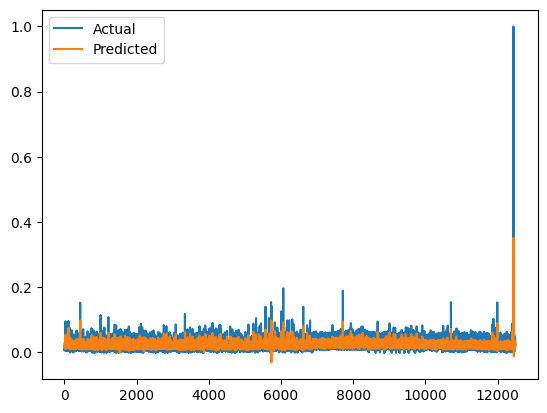

In [20]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


Mean Squared Error: 282113.9043197397


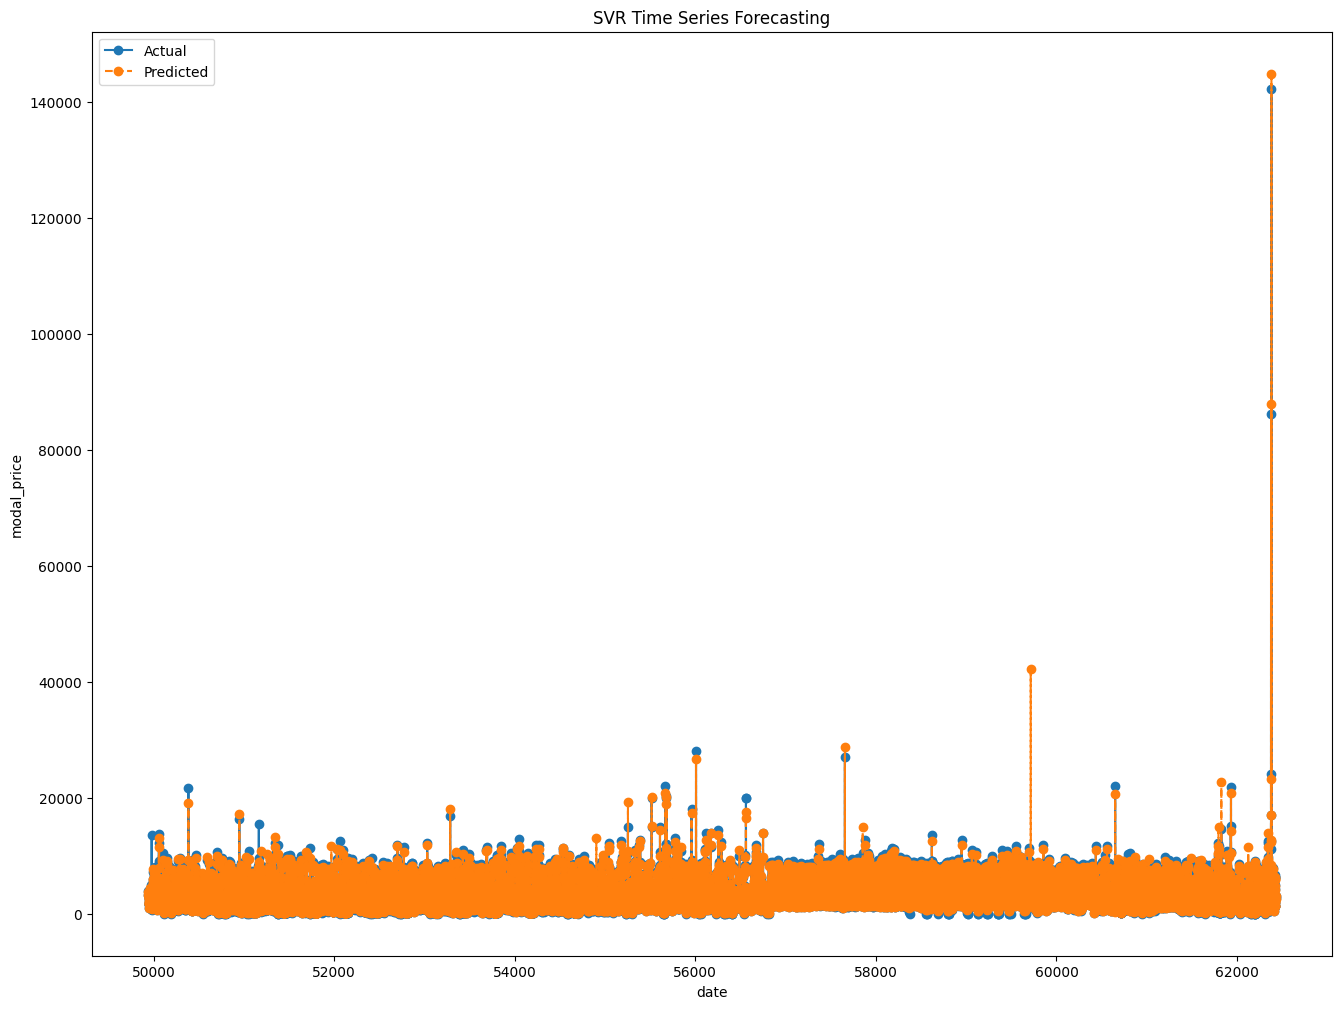

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'Date', 'Price', and additional time series features

# Assuming you have preprocessed your data and created time series features

# Select relevant columns
features = ['arrivals_in_qtl', 'min_price', 'max_price', 'modal_price']


# Extract features and target variable
data = df[features]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Define X (features) and y (target variable) for training and testing
X_train, y_train = train.drop('modal_price', axis=1), train['modal_price']
X_test, y_test = test.drop('modal_price', axis=1), test['modal_price']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted prices
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, predictions, label='Predicted', linestyle='--', marker='o')
plt.xlabel('date')
plt.ylabel('modal_price')
plt.title('SVR Time Series Forecasting')
plt.legend()
plt.show()


In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Train ANN
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Assuming you have an ELM implementation (replace with the actual code)
 #elm_model = ELM()
 #elm_model.fit(X_train, y_train)

# Make predictions
ann_preds = ann_model.predict(X_test)
svr_preds = svr_model.predict(X_test)
#elm_preds = elm_model.predict(X_test)

# Evaluate performance
ann_mse = mean_squared_error(y_test, ann_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
# elm_mse = mean_squared_error(y_test, elm_preds)

# Print results
print("ANN MSE:", ann_mse)
print("SVR MSE:", svr_mse)
 #print("ELM MSE:", elm_mse)

# Compare results and summarize the findings
model_errors = {'ANN': ann_mse, 'SVR': svr_mse}  # Add ELM if implemented

best_model = min(model_errors, key=model_errors.get)
print(f"The best model is {best_model} with MSE: {model_errors[best_model]}")

# Add similar logic for ELM
#if ann_mse < elm_mse:
#     print("ANN outperforms ELM.")
#else:
#     print("ELM outperforms ANN.")


ANN MSE: 0.0003512823165401421
SVR MSE: 0.005547462202112007
The best model is ANN with MSE: 0.0003512823165401421


In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Train ANN
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Assuming you have an ELM implementation (replace with the actual code)
# elm_model = ELM()
# elm_model.fit(X_train, y_train)

# Make predictions
ann_preds = ann_model.predict(X_test)
svr_preds = svr_model.predict(X_test)
# elm_preds = elm_model.predict(X_test)

# Evaluate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ann_mape = calculate_mape(y_test, ann_preds)
svr_mape = calculate_mape(y_test, svr_preds)
# elm_mape = calculate_mape(y_test, elm_preds)

# Evaluate ACC (Assuming a threshold for correct prediction, e.g., within 5%)
threshold = 5
ann_acc = np.sum(np.abs((y_test - ann_preds) / y_test) * 100 <= threshold) / len(y_test) * 100
svr_acc = np.sum(np.abs((y_test - svr_preds) / y_test) * 100 <= threshold) / len(y_test) * 100
# elm_acc = np.sum(np.abs((y_test - elm_preds) / y_test) * 100 <= threshold) / len(y_test) * 100

# Evaluate IR (Impact Ratio)
# Replace the placeholders with the actual calculation for your specific problem
#ir_ann = calculate_ir(y_test, ann_preds)
# ir_svr = calculate_ir(y_test, svr_preds)
# ir_elm = calculate_ir(y_test, elm_preds)

# Print results
print("ANN MAPE:", ann_mape)
print("SVR MAPE:", svr_mape)
# print("ELM MAPE:", elm_mape)

print("ANN Accuracy:", ann_acc)
print("SVR Accuracy:", svr_acc)
# print("ELM Accuracy:", elm_acc)

# Print or calculate IR based on your specific implementation
# print("ANN Impact Ratio:", ir_ann)
# print("SVR Impact Ratio:", ir_svr)
# print("ELM Impact Ratio:", ir_elm)


ANN MAPE: inf
SVR MAPE: inf
ANN Accuracy: 6.568407561678949
SVR Accuracy: 0.23229734059596283


<ipython-input-22-f01c6fc34efc>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-22-f01c6fc34efc>:35: RuntimeWarning: divide by zero encountered in divide
  ann_acc = np.sum(np.abs((y_test - ann_preds) / y_test) * 100 <= threshold) / len(y_test) * 100
<ipython-input-22-f01c6fc34efc>:36: RuntimeWarning: divide by zero encountered in divide
  svr_acc = np.sum(np.abs((y_test - svr_preds) / y_test) * 100 <= threshold) / len(y_test) * 100


In [30]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Monthly_data_cmo.csv')
df.head()

APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra

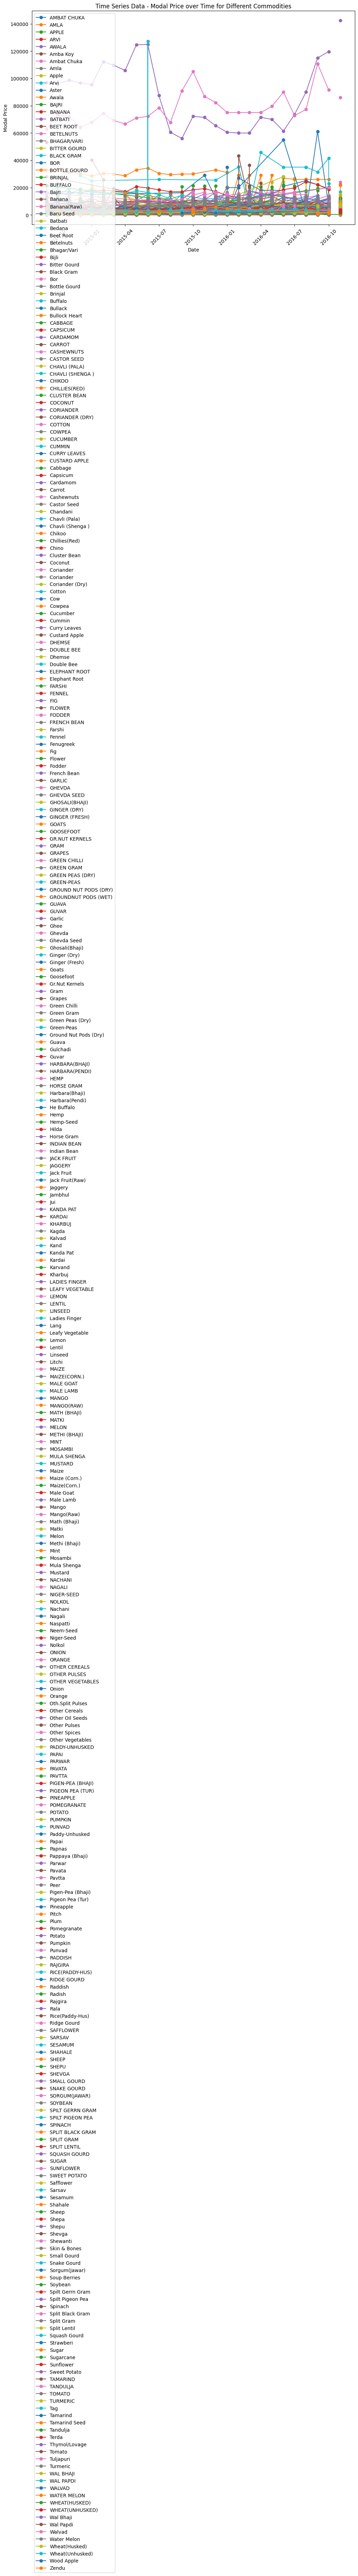

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file
# Replace 'your_dataset.csv' with the actual file name


# Assuming 'date' is in string format. If not, you might need to convert it to datetime.
df['date'] = pd.to_datetime(df['date'])

# Sorting the DataFrame by date and commodity (if not already sorted)
df = df.sort_values(by=['Commodity', 'date'])

# Get unique commodities in the dataset
commodities = df['Commodity'].unique()

# Plotting the time series data for each commodity
plt.figure(figsize=(12, 8))

for commodity in commodities:
    commodity_data = df[df['Commodity'] == commodity]
    plt.plot(commodity_data['date'], commodity_data['modal_price'], label=commodity, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.title('Time Series Data - Modal Price over Time for Different Commodities')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adding a legend to distinguish commodities
plt.legend()

# Display the plot
plt.show()


#visualize timeseries

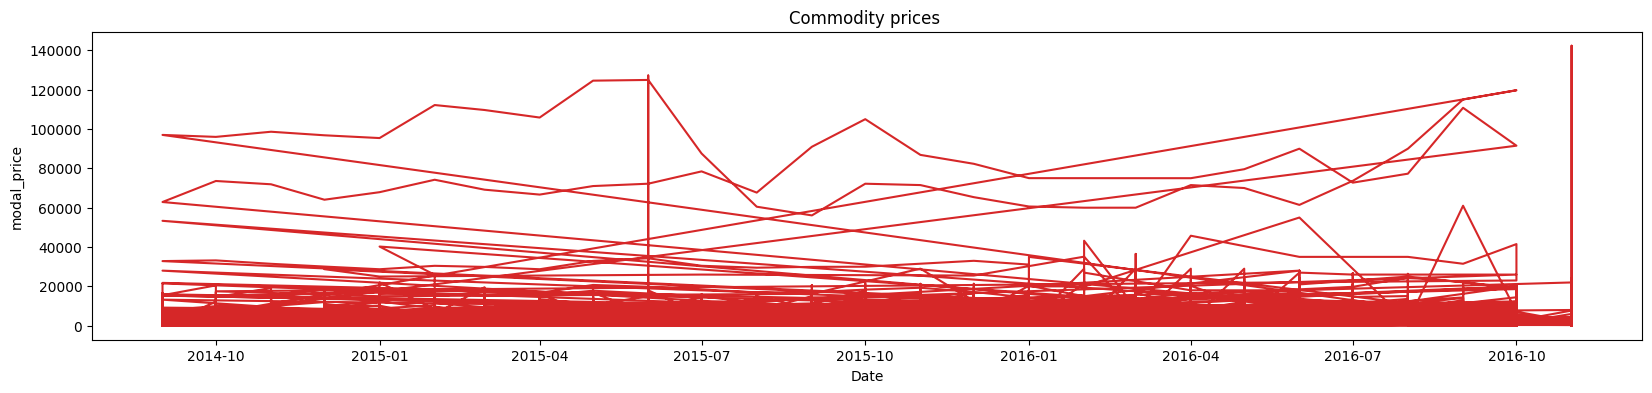

In [26]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='modal_price', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['date'], y=df['modal_price'], title='Commodity prices ')

#patterns in time series

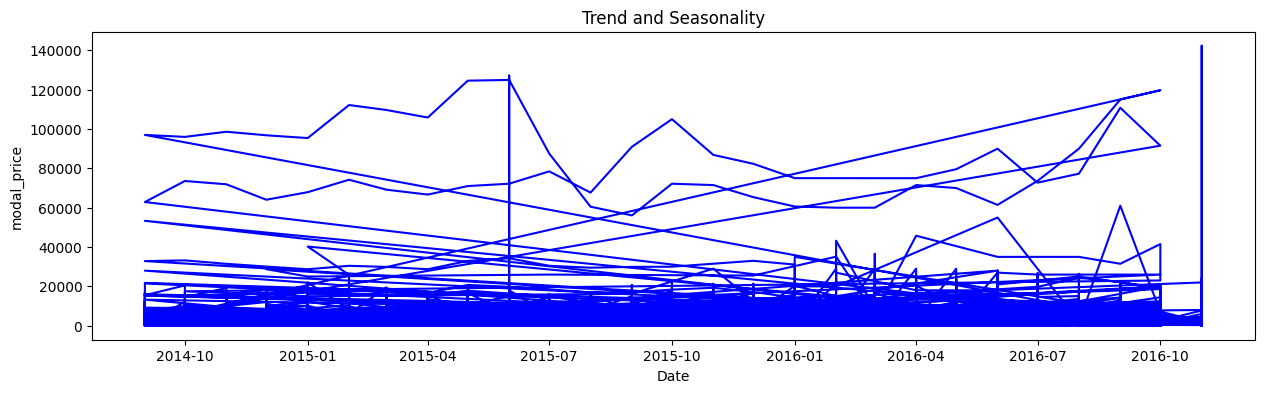

In [27]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='modal_price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['date'], y=df['modal_price'], title='Trend and Seasonality')

#decomposition

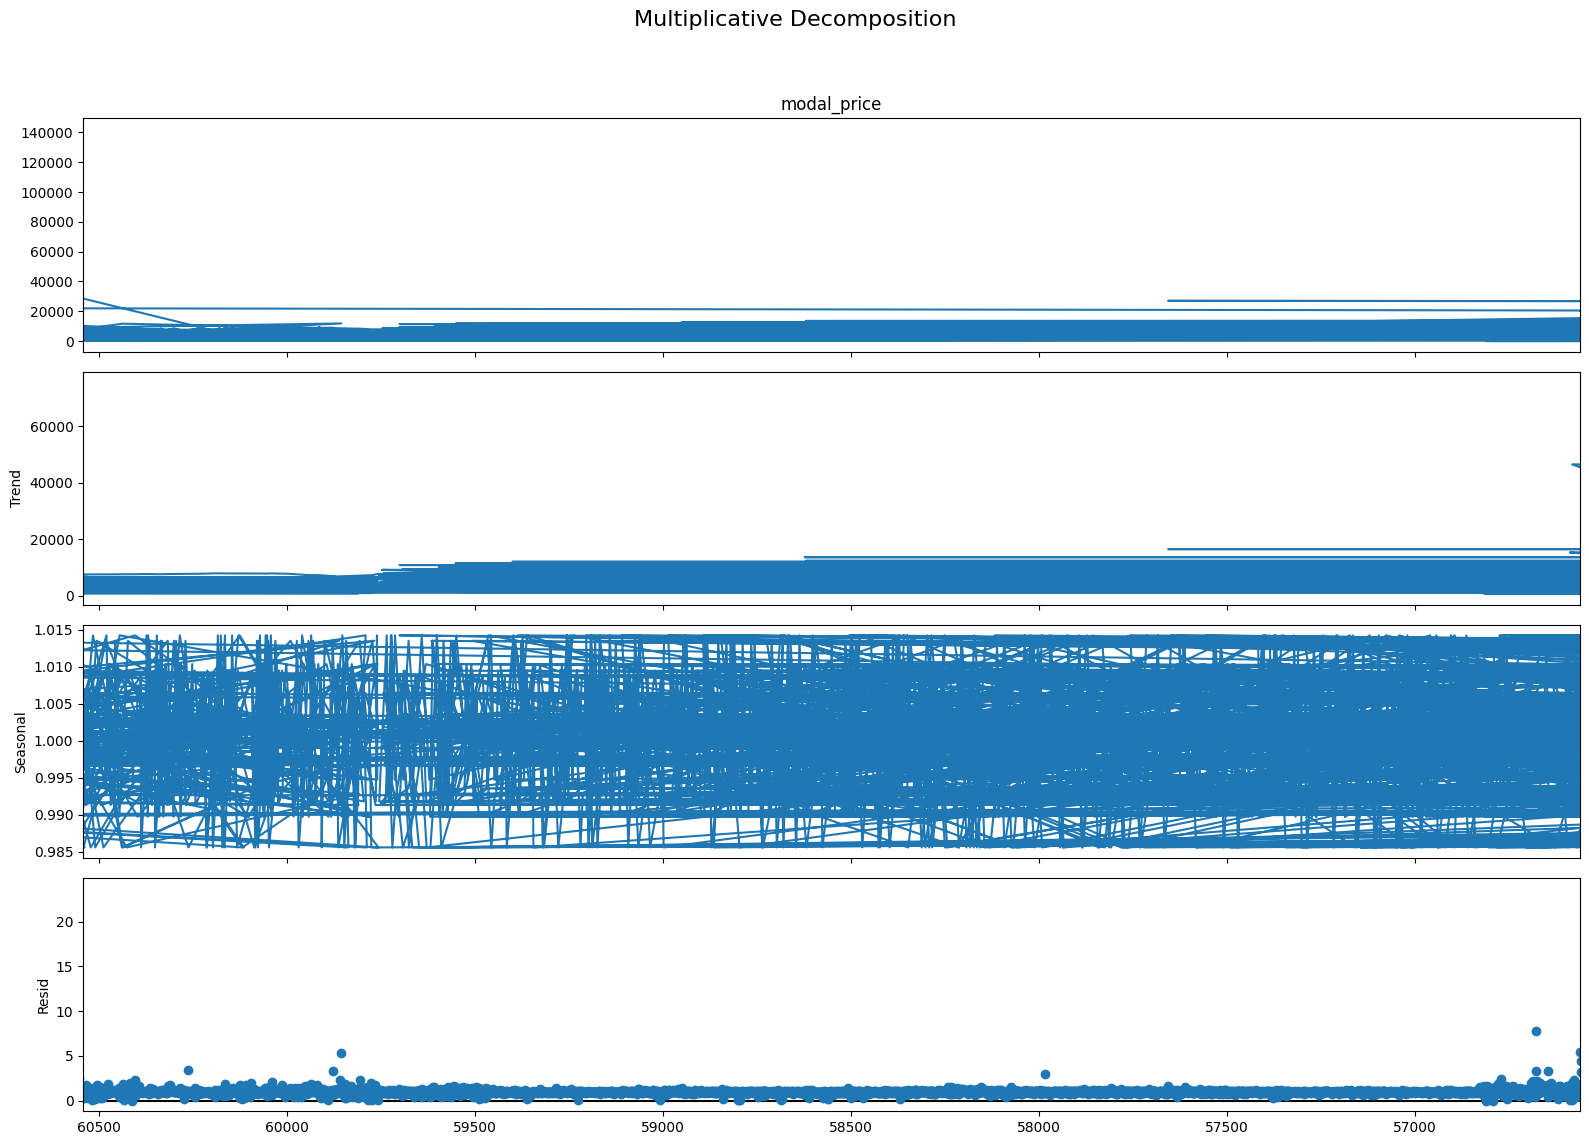

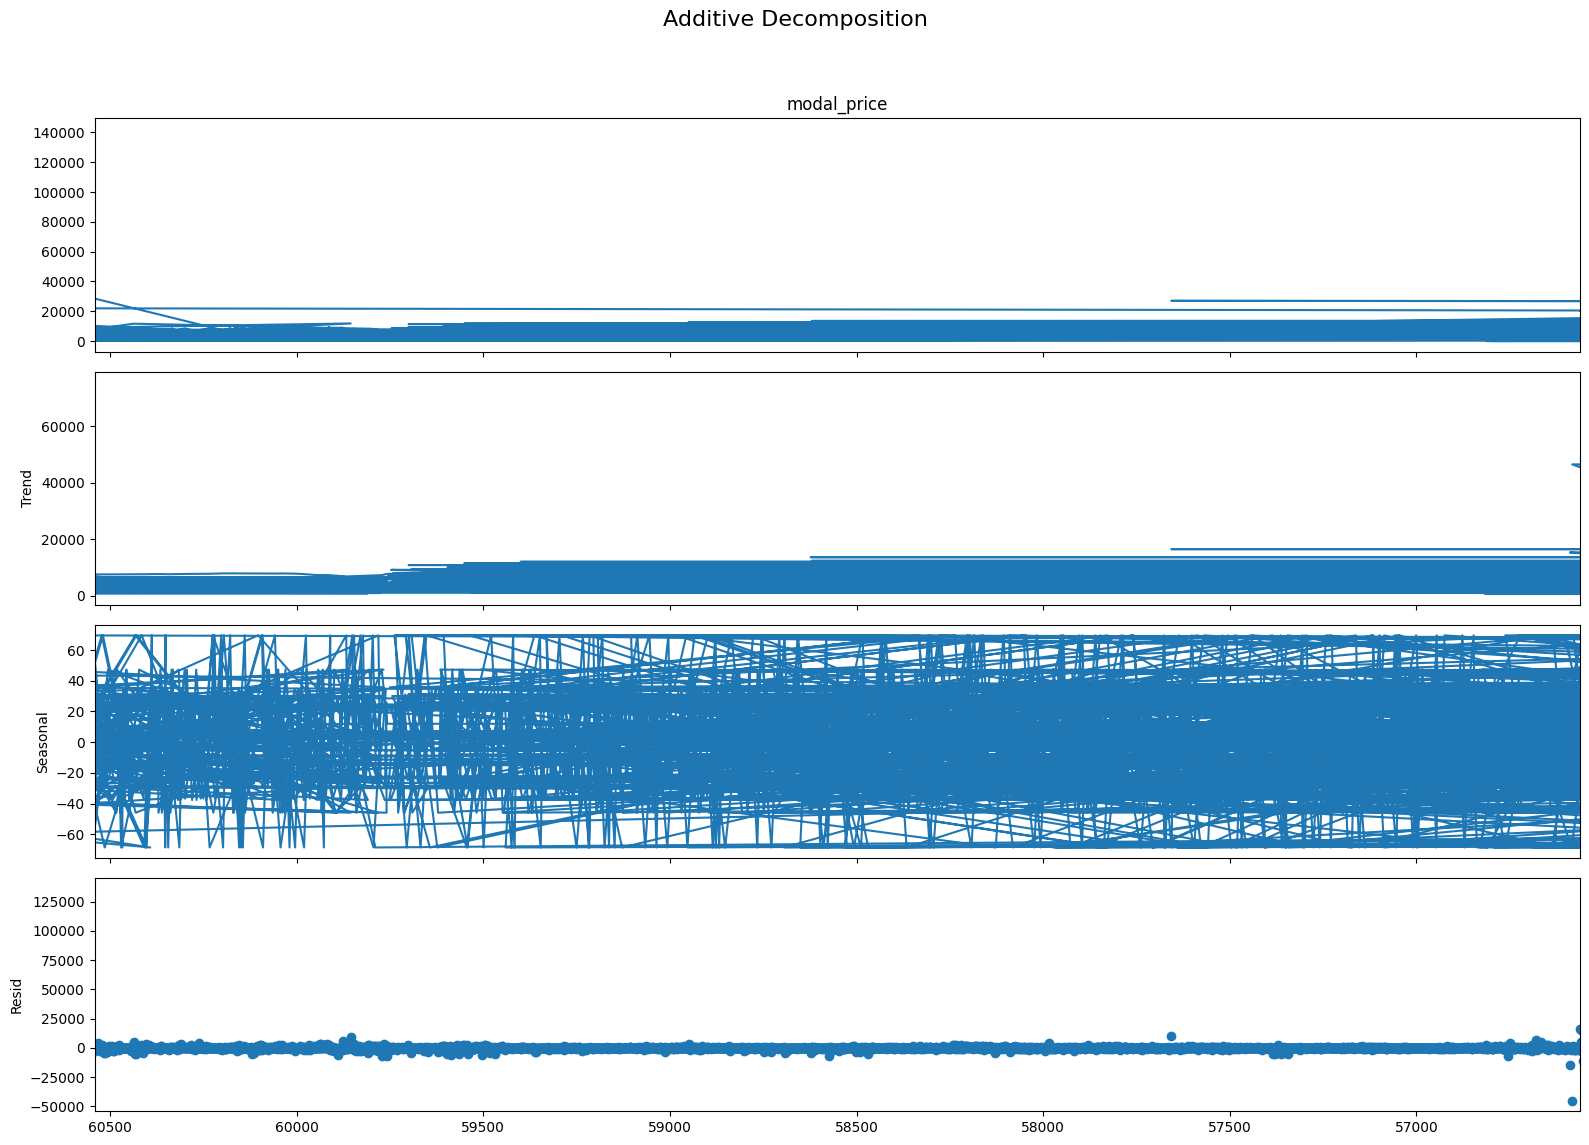

In [28]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Load the DataFrame

# Remove any rows with zero or negative values
df = df[df['modal_price'] > 0]

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['modal_price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['modal_price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

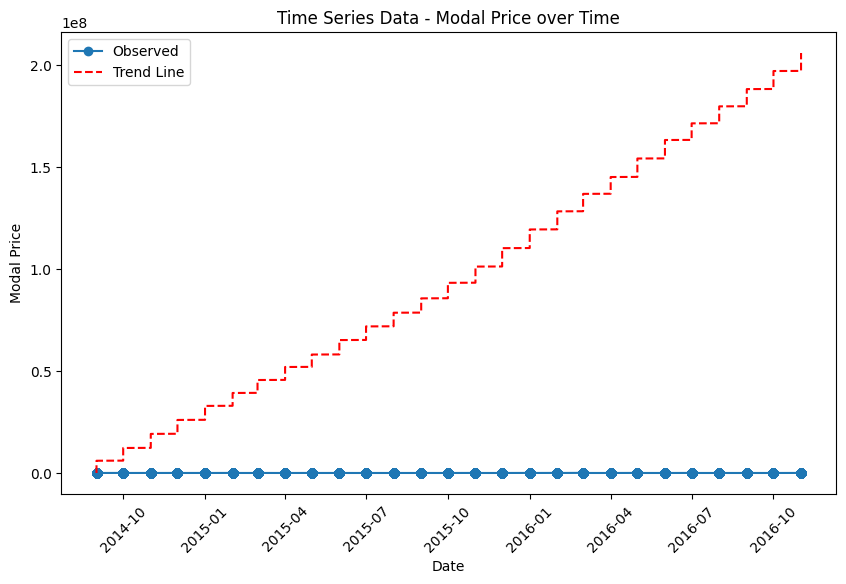

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file
# Replace 'your_dataset.csv' with the actual file name


# Assuming 'date' is in string format. If not, you might need to convert it to datetime.
df['date'] = pd.to_datetime(df['date'])

# Sorting the DataFrame by date (if not already sorted)
df = df.sort_values(by='date')

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['modal_price'], marker='o', linestyle='-', label='Observed')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.title('Time Series Data - Modal Price over Time')

# Adding a trend line (linear regression)
trend_line = pd.Series(range(1, len(df) + 1)) * df['modal_price'].mean()
plt.plot(df['date'], trend_line, linestyle='--', color='red', label='Trend Line')

# Adding a legend to distinguish observed data and trend line
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()
